# Exercise set 10


>The goal of this exercise is to gain familiarity with some
classification methods and the different ways we can assess and compare them.

## Exercise 10.1


In this exercise, we will consider the
[UCI ML Breast Cancer Wisconsin (Diagnostic) dataset](https://goo.gl/U2Uwz2).

This data set contains 569 tumours classified
as malignant or benign. In addition, 30 variables have been
measured, and our goal is to make a predictive model that
can classify new tumours as malignant or benign.

An overview of the different variables can be found
on the 
[scikit-learn website](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset).
In the following, we are going to label the two classes as:

* `benign` as a negative ($-1$), and
* `malignant` as a positive ($+1$). 


In the lectures, we mentioned categorical variables and that we might have to
transform these to use them in practice.
[Dummy variables](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) and
[one-hot encoding](https://en.wikipedia.org/wiki/One-hot) are examples of such transformations.
In scikit-learn, we do normally not have to worry about this for the y-values we use in classification.
For instance, the
[scikit-learn documentation for decision trees](https://scikit-learn.org/stable/modules/tree.html#classification)
says that a decision tree 
> is capable of both binary (where the labels are $[-1, 1]$) classification and multiclass (where the labels are 
$[0, \ldots, K-1]$) classification

so we use the values $-1$ and $+1$ to represent the two classes here. 

### 10.1(a) 

Begin by loading the raw data and creating
a test set using $33$\% of the available data points for the test set.
The example code below can be used to load the data set
and create training/test sets:

In [47]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data["data"]
# "Rename" y so that -1 = benign and 1 = malignant:
y = [-1 if i == 1 else 1 for i in data["target"]]
class_names = ["benign", "malignant"]
print("Classes:")
print(class_names)

print("Variables:", data["feature_names"])

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    # stratify=y, # Uncomment if you are using stratification
)


Classes:
['benign', 'malignant']
Variables: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


For creating the training/test sets we use the method
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
from the module [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection). One of the input parameters to `train_test_split` is
`stratify`:


* (i) Reading the documentation for
  [stratification](https://scikit-learn.org/stable/modules/cross_validation.html#stratification)
  (or the [Wikipedia entry on stratified sampling](https://en.wikipedia.org/wiki/Stratified_sampling))
  can you explain what `stratify` does?


* (ii)  Should we use `stratify` here?

In [50]:
# Your code here

data = load_breast_cancer(as_frame=True) # target, 1 = benign, 0 = malignant   
X = data["data"]
# "Rename" y so that -1 = benign and 1 = malignant:
y = [-1 if i == 1 else 1 for i in data["target"]] # i.e -1 if data["target"] (diagnosis) is 1 (i.e benign), 1 if target is else (i.e 0/malignant)
class_names = ["benign", "malignant"]
print("Classes:")
print(class_names)

print("Variables:", data["feature_names"])
print(y)

X_train, X_test, y_train, y_test = train_test_split( # split into x- and y-training -and testing sets
    X,
    y,
    test_size=0.33,
    stratify=y, # Uncomment if you are using stratification
)

# count = 0
# for target in data["target"]:
#     if target == 1:
#         count+=1
# print(count)

Classes:
['benign', 'malignant']
Variables: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 

#### Your answer to question 10.1(a):

Imbalance in distribution of target classes, Stratify to ensure that relative class frequencies are preserved in training and testing sets.

i) Stratification makes sure that the test and training sets contains (approximately) the same amount of samples from each class so that the model is not based on more data from one or the other (skewed).

ii) There are 212 malignant and 357 benign tumors in the dataset, which means it might be worthwhile to stratify in order to ensure that the test and training sets contain equal measures of benign and malignant data, considering that the malignant set is less than 2/3 the number of benign.

### 10.1(b)
In this case, we have to determine what
metric we are going to use
to judge the performance of the classifiers we make. Before selecting
a metric, we should consider what false positives and false negatives
mean for our current problem: How would you define these two terms in our present
case, and would you say that false positives are a more serious mistake than false negatives here?

#### Your answer to question 10.1(b):

In this case I would define a negative result as a benign tumour, and a positive result as the malignant.
A false positive would therefore be that the tumor is diagnosed as malignant when in reality it is benign, and a false negative would diagnose the tumour as benign when it actually is malignant.

I would also consider a false negative to me more severe, if the tumour is diagnosed as benign there might not be taken further measures in terms of treatment, and the tumour is allowed to grow, causing serious damage. If the patient experiences symptoms the tests might disregard the possibility of cancer since the tumour is already diagnosed. By the time the mistake is discovered it might be too late. 

A false positive would result in treatment, and subsequent follow-ups would discover this fast. 

### 10.1(c)
Following up on the previous question, here
are some [metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html) we could use to assess the performance of a
classifier model we make:


* **Precision**: The ratio of true positives to the sum of
  true positives and false positives.


* **Recall**: The ratio of true positives to the sum of true positives and false negatives.


* **F1**: The (harmonic) mean of the precision and recall.


In addition, we can summarize the performance using the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).


(Note: There are many [other possibilities](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)
as well! If you are curious, you can, for instance, include the
*accuracy* (the ratio of correct predictions
to the number of total predictions).)


The choice of the metric for assessing a classifier will lead to different results.
For instance, if we choose to use precision as our metric, we will maximize it
during the optimization of our model. This means that we will *minimize* the
number of *false positives*. If we choose to use the recall, on the other hand,
we will *minimize* the number of *false negatives*.


In the following, we will calculate all these metrics for the
different classification methods we consider. At the end of the
exercise, you will be asked to compare the different classifiers
using them. But before we do that: 
Which of the
metrics mentioned above is most important for
our classification task?

(Note: There is no single correct answer here: it depends on how you judge the seriousness of false positives vs false negatives.)

#### Your answer to question 10.1(c):

In 10.1 b I determined the most serious error to be false negative, which means the most important metric for this model would be recall in order to minimize the number of false negatives.

### 10.1(d)
Create a [$k$-nearest neighbour classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 with 3 neighbours and
fit it using your training set. Evaluate (with the test set) the classifier using the
precision, recall, and F1 metrics, and plot the confusion matrix.

An
example of how this can be done is:

precision = 0.953125
recall = 0.8714285714285714
f1 = 0.9104477611940298


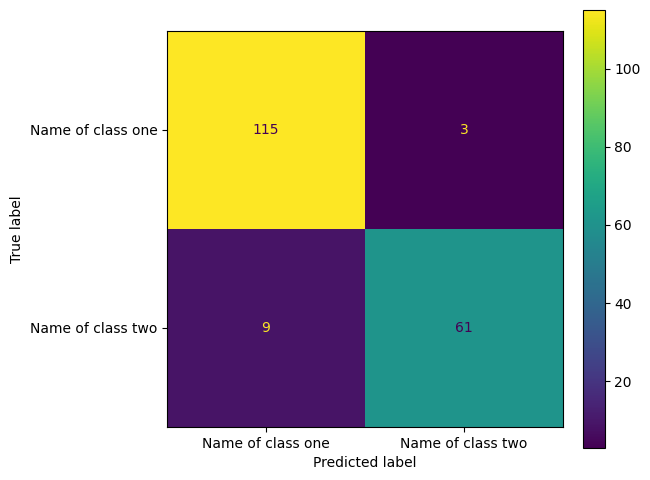

In [51]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

# Create a classifier:
knn3 = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier on the training set:
knn3.fit(X_train, y_train)

# Use classifier for prediction for the test set:
y_hat = knn3.predict(X_test)

# Calculate the precision etc. for the test set:
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
print(f"precision = {precision}")
print(f"recall = {recall}")
print(f"f1 = {f1}")

# Make confusion matrix:
fig, ax = plt.subplots(constrained_layout=True)
ConfusionMatrixDisplay.from_estimator(
    knn3,
    X_test,
    y_test,
    display_labels=["Name of class one", "Name of class two"],
    ax=ax,  # Use the figure we created above
)

How many false positives and false negatives do you get?

precision = 0.953125
recall = 0.8714285714285714
f1 = 0.9104477611940298
Number of false positives: 3
Number of false negatives: 9


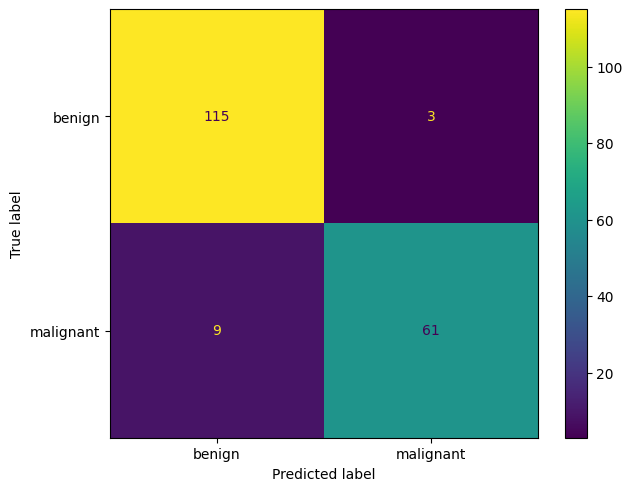

In [63]:
# Your code here

FP = 0
for i,j in zip(y_test,y_hat):
    if i == -1 and j == 1:
        FP+=1
print(f"Number of false positives: {FP}")

FN = 0
for i,j in zip(y_test, y_hat):
    if i == 1 and j == -1:
        FN+=1
print(f"Number of false negatives: {FN}")

# Make confusion matrix:
fig, ax = plt.subplots(constrained_layout=True)
ConfusionMatrixDisplay.from_estimator(
    knn3,
    X_test,
    y_test,
    display_labels=class_names,
    ax=ax,  # Use the figure we created above
)

#### Your answer to question 10.1(d):

There were 9 false negatives and 3 false positives

### 10.1(e)
We will now try to optimize the $k$ for a $k$-nearest neighbour classifier.
This can be done using the method [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

One of the inputs to this method is the `scoring` parameter, which
selects the metric to use for finding the best $k$. Use the metric
you deemed most important in question [10.1(c)](#10.1(c)) 
and use $k$-values in the range $1 \leq k \leq 10$ in your search for the best $k$.

An example
of how this can be done is:

Best knn: KNeighborsClassifier(n_neighbors=7)
precision = 0.9230769230769231
recall = 0.8571428571428571
f1 = 0.8888888888888888


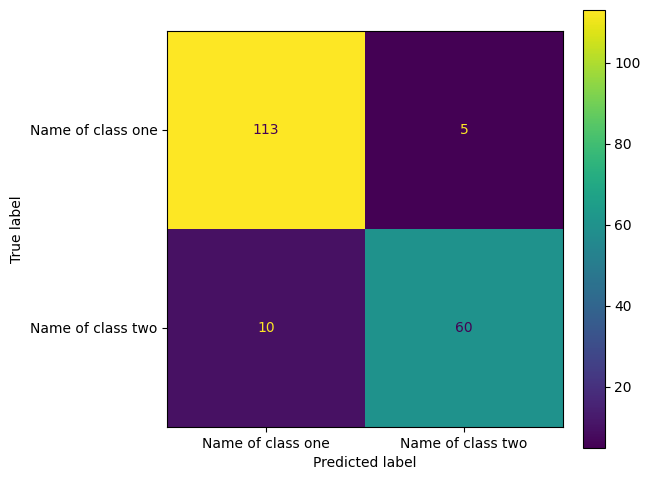

In [64]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Set up a grid search:
parameters = {"n_neighbors": range(1, 11)}
grid = GridSearchCV(
    KNeighborsClassifier(),
    parameters,
    scoring="accuracy",  # Select scoring here!
)

# Run the grid search:
grid.fit(X_train, y_train)

# Get the best classifier from the grid search:
best_knn = grid.best_estimator_
print("Best knn:", best_knn)

# Use the best classifier for the test set:
y_hat = best_knn.predict(X_test)

# Calculate the precision etc. for the test set:
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
print(f"precision = {precision}")
print(f"recall = {recall}")
print(f"f1 = {f1}")

# Make confusion matrix:
fig, ax = plt.subplots(constrained_layout=True)
ConfusionMatrixDisplay.from_estimator(
    best_knn,
    X_test,
    y_test,
    display_labels=["Name of class one", "Name of class two"],
    ax=ax,  # Use the figure we created above
)

Evaluate the optimised classifier using
the metrics mentioned above (with the test set) and plot the confusion matrix.
What value for $k$ did you find? And did the number of false
positives and false negatives change compared to the non-optimised $k$-nearest neighbour classifier?

Best knn: KNeighborsClassifier()
precision = 0.9242424242424242
recall = 0.8714285714285714
f1 = 0.8970588235294118
Number of false positives: 5
Number of false negatives: 9


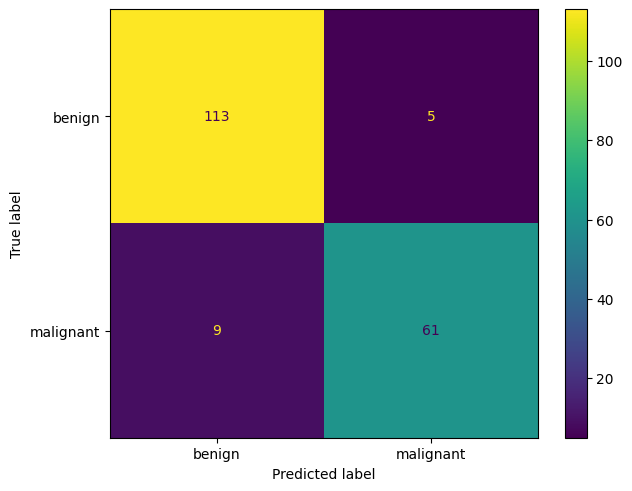

In [77]:
# Your code here

# Set up a grid search:
parameters = {"n_neighbors": range(1, 11)}
grid = GridSearchCV(
    KNeighborsClassifier(),
    parameters,
    scoring="recall",  # Select scoring here! # Using recall as determined in 10.1 b
)

# Run the grid search:
grid.fit(X_train, y_train)

# Get the best classifier from the grid search:
best_knn = grid.best_estimator_
print("Best knn:", best_knn)

# Use the best classifier for the test set:
y_hat = best_knn.predict(X_test)

# Calculate the precision etc. for the test set:
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
print(f"precision = {precision}")
print(f"recall = {recall}")
print(f"f1 = {f1}")

FP = 0
for i,j in zip(y_test,y_hat):
    if i == -1 and j == 1:
        FP+=1
print(f"Number of false positives: {FP}")

FN = 0
for i,j in zip(y_test, y_hat):
    if i == 1 and j == -1:
        FN+=1
print(f"Number of false negatives: {FN}")

# Make confusion matrix:
fig, ax = plt.subplots(constrained_layout=True)
ConfusionMatrixDisplay.from_estimator(
    best_knn,
    X_test,
    y_test,
    display_labels=class_names,
    ax=ax,  # Use the figure we created above
)



#### Your answer to question 10.1(e):

The recall score when using recall as the optimizing parameter is slightly higher (0.871 vs 0.857), and yields one less false negative

### 10.1(f)
Create a [decision tree classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
and fit it using your training set. Limit the tree to $3$ levels by setting
the parameter `max_depth=3`.
Evaluate the classifier using the
metrics mentioned above (with the test set) and plot the confusion matrix.

Note, the example below question [10.1(h)](#10.1(h)) shows how you can 
create the decision tree and optimise it. The example will plot the decision tree.
You can use this code as
inspiration for solving [10.1(f)](#10.1(f)) and the following two questions (maybe you
prefer to do them all at once).

In [ ]:
# Your code here
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)

#### Your answer to question 10.1(f):
*Double click here*

### 10.1(g)
We will also
try to tune the `DecisionTreeClassifier`
by determining the maximum depth
we should use for the tree. Use the method
`GridSearchCV` to optimize the parameter
`max_depth` for the `DecisionTreeClassifier`.
Use the metric you deemed most important
in question [10.1(c)](#10.1(c)). Limit the depth to the range `max_depth = range(1, 21)`, but also
include a depth where you set `max_depth = None` (this lets the
tree expand as far down as possible).

Evaluate the classifier with the best `max_depth` using the
metrics mentioned above (with the test set) and plot the confusion matrix.

What is the best `max_depth` you find in this case?

In [ ]:
# Your code here

#### Your answer to question 10.1(g):
*Double click here*

### 10.1(h)
Visualise the best decision tree you found. This
can be done using the
method [export_graphviz from sklearn.tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html),
or the method [plot_tree from sklearn.tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

An example using `export_graphviz` is:

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.model_selection import train_test_split, GridSearchCV

# First grab the variable names, these can be used to label
# variables in the plot of the decision tree:
variables = data["feature_names"]

# Set up a grid search:
parameters = {"max_depth": list(range(1, 21)) + [None]}
grid = GridSearchCV(
    DecisionTreeClassifier(),
    parameters,
    scoring="accuracy",  # Select scoring here!
)
# Run the grid search:
grid.fit(X_train, y_train)

# Get the best classifier from the grid search:
best_clf = grid.best_estimator_
print("Best tree:", best_clf)

# Show the decision tree:
dot_data = export_graphviz(
    best_clf,  # The decision tree we want to draw
    out_file=None,  # We will set the file name later
    feature_names=variables,  # Name of variables
    class_names=[
        "Name of first class",
        "Name of second class",
    ],  # Class names, update these!
    rounded=True,  # Use rounded boxes
    filled=True,  # Use colors
)
graph = graphviz.Source(dot_data)
graph.render("tree", view=True)  # Show the tree, and create a tree.pdf for it.

(If the code above executed successfully, a file named [tree.pdf](./tree.pdf) should have been created.)

In [ ]:
# The plot tree method is used as follows:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt


fig, ax = plt.subplots(constrained_layout=True, figsize=(32, 8))
# If the three is too small, you can change the figsize above^ or adjust the fontsize below
plot_tree(
    best_clf,  # The decision tree we want to draw
    feature_names=variables,  # Name of variables
    class_names=["Name of first class", "Name of second class"],  # Class names
    rounded=True,  # Use rounded boxes
    filled=True,  # Use colors
    ax=ax,  # Use this axes for plotting
    fontsize=10,
)
fig.savefig("tree2.pdf", bbox_inches="tight")

(If the code above executed successfully, a file named [tree2.pdf](tree2.pdf) should have been created.)

In [ ]:
# Your code here

#### Your answer to question 10.1(h):
*Double click here*

### 10.1(i)
Compare the precision, recall, and F1 scores for the classifiers you have considered.
If you were to select one
classifier to put into real-life use, which one would you choose and why?

In [ ]:
# Your code here

#### Your answer to question 10.1(i):
*Double click here*

### 10.1(j)
Extra task for the curious student: Create an alternative classifier, for instance,
using a so-called [support vector machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). We will not go into the details about how
this classifier works in our lectures, but with `sckikit-learn` it is rather easy
to try
it and see what it can do for us.

In the scikit-learn documentation, there is also [an example that compares several classifiers](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html). Maybe you can find one
that outperforms those we have considered in this exercise?

In [ ]:
# Your code here

#### Your answer to question 10.1(j):
*Double click here*

## Exercise 10.2

Consider again the data set for ovarian cancer and the measured gene expressions (see exercise 9).
Create a decision tree classifier for this data set. Limit the depth of the decision
tree to 2, and visualise the decision tree. How do the "rules" the decision tree uses
for its classification compare to what you found from the PCA analysis?
Does it consider the same genes?

Note: There is some "randomness" in decision trees, so
the tree you now
create will likely
use different genes from the ones you
found in exercise 9. You can rerun your code a few times to see how the randomness influences
things or you can also change the depth of the tree to see if it picks out
more genes.

In [ ]:
# Your code here

#### Your answer to question 10.2:
*Double click here*